# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [47]:
#!pip install scikit-learn
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

In [48]:
# Or via sklearn method
## Preprocessing: One hot encoder
penguins = load_penguins().dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

# Linear and Nonlinear prediction from JUST bill length

In [51]:
#Since we've been asked to use just bill_length to predict, let's redefine X
X = penguins['bill_length_mm']
y = penguins['bill_depth_mm']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


#pipeline components for pre-cleaning and regression
enc = OneHotEncoder(handle_unknown='ignore')
lr = LinearRegression() #model

#result df
y_preds = []
orders = []
x_vals = []
y_vals = []
#Perform a loop to do degrees 1,2,3,10
colors = ['blue', 'green', 'red','black']
for ind,degree in enumerate([1,2,3,10]):
    #Change poly order regression
    poly = PolynomialFeatures(degree=(1,degree), include_bias=False)
    #Redefine the model with this order degree
    model = Pipeline([
    #('dummify',enc),
    ("polify", poly),
    ("ols", lr)
    ])
    #Fit the model and predict values
    model.fit(X_train.to_numpy().reshape(-1,1), y_train)
    y_pred = model.predict(X_test.to_numpy().reshape(-1,1))
    
    #Add data to col
    y_preds += list(y_pred)
    orders += [str(degree)]*len(y_pred)
    x_vals += list(X_test)
    y_vals += list(y_test)
lines_df = pd.DataFrame({"y_pred":y_preds,"degree":orders,"x_vals":x_vals,"y_vals":y_vals})
lines_df

,y_pred,degree,x_vals,y_vals
0,17.315425,1,41.6,18.0
1,16.461688,1,52.7,19.8
2,16.792415,1,48.4,16.3
3,16.630897,1,50.5,15.9
4,17.253894,1,42.4,17.3
...,...,...,...,...
331,18.312267,10,39.1,18.7
332,18.819250,10,52.5,15.6
333,15.628265,10,45.7,13.9
334,17.973798,10,35.9,16.6


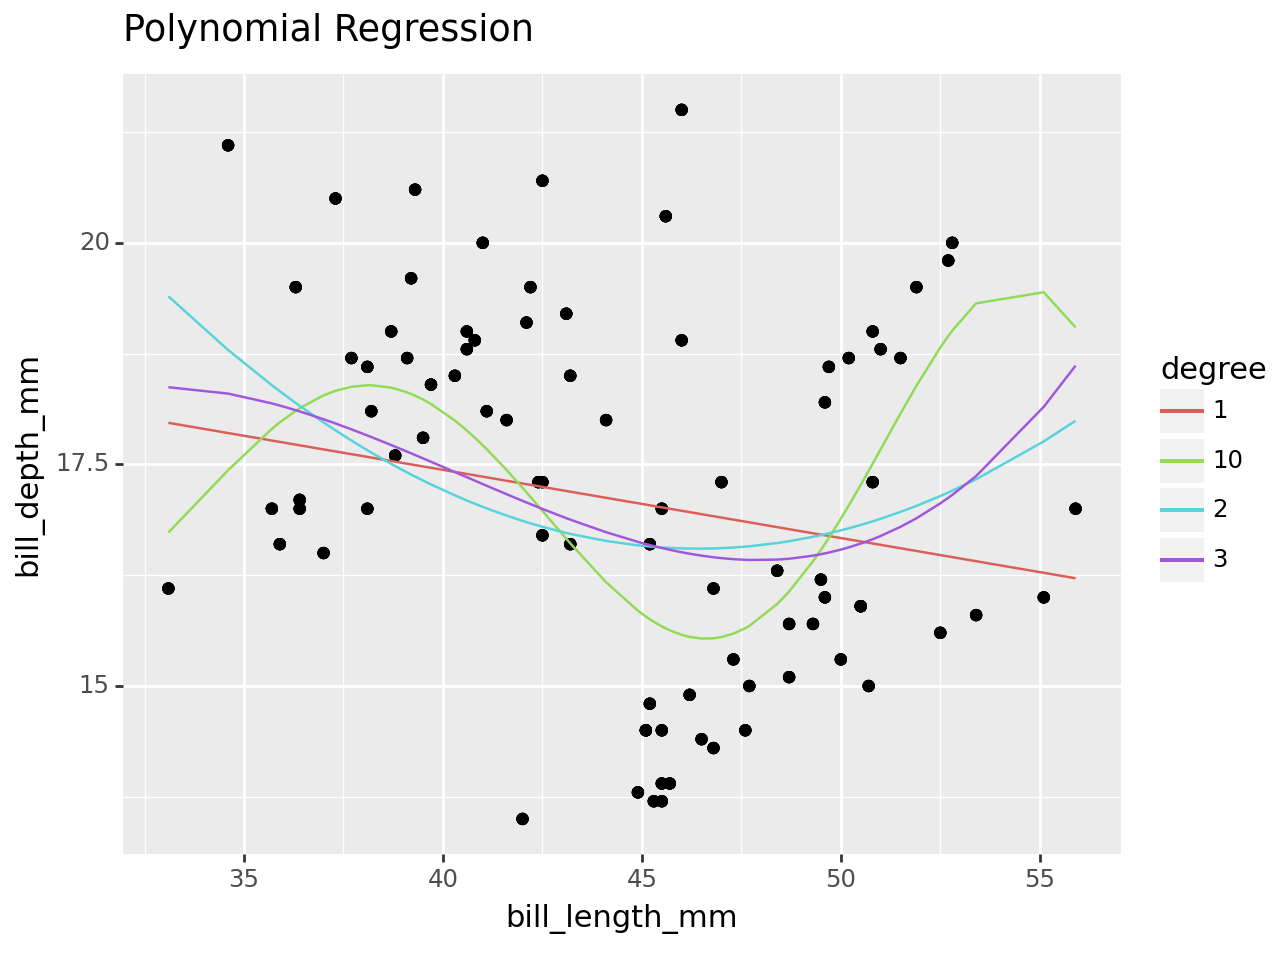

In [52]:
from plotnine import ggplot,aes,geom_point,geom_smooth,labs,geom_line,scale_color_manual
# Create a color mapping for degrees
# Create the plot
plot = (ggplot(lines_df, aes(x='x_vals', y='y_pred', color='degree'))
        + labs(x='bill_length_mm', y='bill_depth_mm', title='Polynomial Regression')
        + geom_point(aes(x='x_vals', y='y_vals'),color='black')
        + geom_line()
        )

print(plot)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?